# CSC 593

## Week 12

### [`scikit-image`](https://scikit-image.org/)


*Optional:*

`conda install -c conda-forge scikit-image`

In [36]:
import math

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import skimage

#Needed for reading files.
import skimage.io

from ipywidgets import interact, interact_manual, interactive_output
import ipywidgets as widgets

from IPython.display import display
from IPython.core.display import HTML

`showimg` is just a simple image display function that enlarges the image display and hides `pyplot`'s default axes.

In [37]:
def showimg(im, sizefactor = 2.5, cmap=None):
    #https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
    fig_size = plt.gcf().get_size_inches() #Get current size
    plt.gcf().set_size_inches(sizefactor * fig_size) 
    plt.imshow(im, cmap=cmap)
    plt.axis('off')
    plt.show()

#### RGB Colors

The most common method of describing colors to computers (because it's how monitors work). Each pixel is described by three numbers representing the intensity of Red, Green and Blue at that position in the image.

In [38]:
@interact(r=(0,255), g=(0,255), b=(0,255))
def rgbdiv(r=255, g=100, b=200):
    display(HTML('<div style="border:black 1px solid;height:3em;background-color:rgb(%d,%d,%d)"></div>'%(r,g,b)))

interactive(children=(IntSlider(value=255, description='r', max=255), IntSlider(value=100, description='g', ma…

#### Nutmeg

As an example for most of the below, here's Nutmeg.

_[`skimage.io.imread()`](https://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imread)`_: Read an image from file into a format scikit-image can understand.

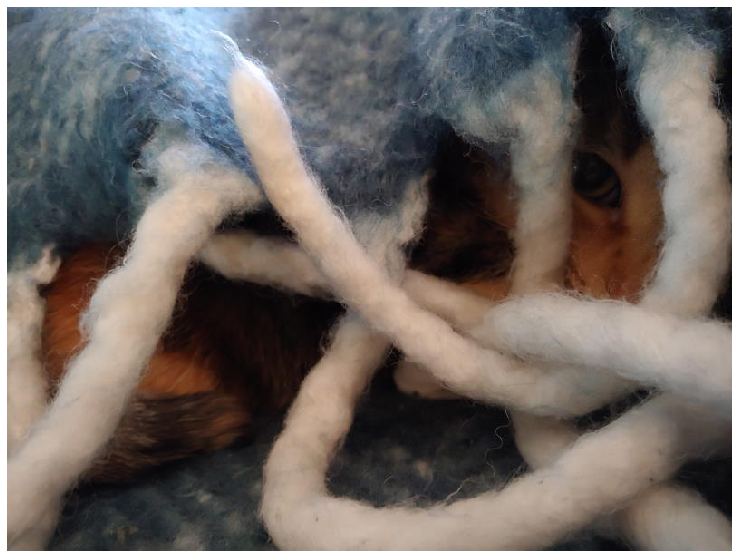

In [39]:
nutmeg = skimage.io.imread('../data/image/nutmeg.jpg')
showimg(nutmeg, 2.5)

Color images are represented as three-dimensional arrays. Think of this as an Excel workbook with three spreadsheets representing red, green, and blue. Taking `A1` from all three sheets gives you the data you need to determine the color of the top left pixel.

In [6]:
nutmeg[:1]

Array([[[ 92, 110, 132],
        [ 90, 108, 130],
        [ 92, 108, 131],
        ...,
        [ 26,  33,  41],
        [ 41,  48,  56],
        [ 55,  62,  70]]], dtype=uint8)

We can also read a single color "sheet". Here's `nutmeg`'s red elements.

In [7]:
nutmeg[:1,:,0]

Array([[ 92,  90,  92,  94,  92,  89,  92,  97,  98,  99, 100,  99, 103,
        106, 105,  99,  94,  97, 101, 105, 107, 106, 104, 102,  98,  94,
         92,  94, 100, 103, 102, 100,  94, 102, 107, 101,  90,  87,  98,
        108, 106, 110, 109, 104, 104, 113, 116, 113, 117, 114, 112, 115,
        119, 121, 119, 118, 123, 128, 132, 129, 121, 116, 118, 122, 117,
        122, 128, 129, 129, 127, 130, 131, 131, 131, 130, 130, 131, 132,
        129, 128, 132, 132, 132, 132, 132, 132, 132, 132, 135, 139, 142,
        137, 129, 126, 130, 135, 121, 114, 127, 155, 161, 146, 136, 142,
        142, 142, 143, 145, 149, 153, 156, 158, 163, 159, 158, 160, 155,
        148, 147, 149, 154, 153, 152, 152, 154, 152, 148, 143, 146, 148,
        150, 151, 156, 162, 162, 157, 158, 150, 148, 158, 167, 166, 163,
        162, 158, 153, 149, 150, 154, 157, 155, 152, 152, 154, 160, 166,
        167, 165, 169, 176, 170, 170, 171, 171, 171, 173, 174, 175, 176,
        181, 184, 180, 172, 168, 171, 175, 177, 177

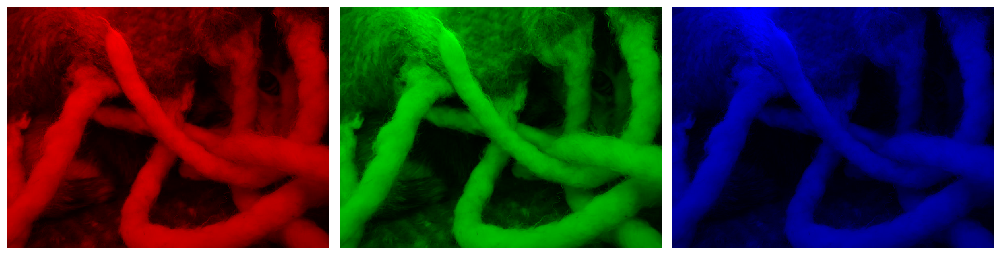

/Users/timjonas/opt/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: ../data/image/nutmeg.b.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


In [8]:
def split_rgb(im, n=False):
    rim = im.copy()
    rim[:,:,1]=0 #Green
    rim[:,:,2]=0 #Blue
    
    gim = im.copy()
    gim[:,:,0]=0 #Red
    gim[:,:,2]=0
    
    bim = im.copy()
    bim[:,:,0]=0
    bim[:,:,1]=0
    
    fig, (rax, gax, bax) = plt.subplots(nrows=1, ncols=3, figsize=(14,5))
    
    rax.imshow(rim)
    rax.set_axis_off()
    
    gax.imshow(gim)
    gax.set_axis_off()
    
    bax.imshow(bim)
    bax.set_axis_off()
    
    fig.tight_layout()
    plt.show()
    #showimg(img, 2.5)
    
    if n:
        skimage.io.imsave('../data/image/'+n+'.r.jpg', rim)
        skimage.io.imsave('../data/image/'+n+'.g.jpg', gim)
        skimage.io.imsave('../data/image/'+n+'.b.jpg', bim)

split_rgb(nutmeg, 'nutmeg')

We can also multiply a three-element tuple (or list, Numpy Array, etc.) to the image to alter every pixel.

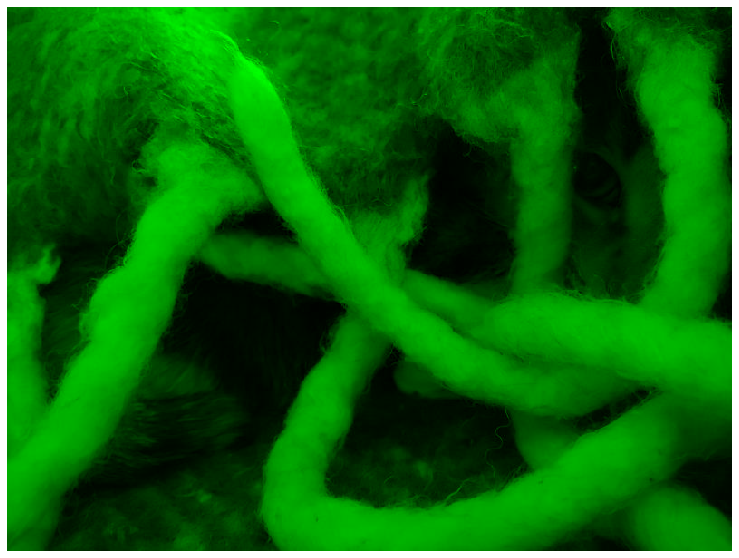

In [55]:
#Green nutmeg again.
showimg(nutmeg * (0,1,0), 2.5)

In [9]:
def rgbimg(im, r=1, g=1, b=1):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
    img = ( im * (r, g, b) ).astype(int)
    ax1.imshow(im)
    ax1.set_axis_off()
    ax2.imshow(img)
    ax2.set_axis_off()
    fig.tight_layout()
    plt.show()
    #showimg(img, 2.5)

In [10]:
rw = widgets.FloatSlider(1, min=0, max=1, step=.01, continuous_update=False)
gw = widgets.FloatSlider(1, min=0, max=1, step=.01, continuous_update=False)
bw = widgets.FloatSlider(1, min=0, max=1, step=.01, continuous_update=False)

@interact(r=rw, g=gw, b=bw)
def rgbnutmeg(r=1, g=1, b=1):
    rgbimg(nutmeg, r, g, b)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='r', max=1.0, step=0.01), Fl…

_[`skimage.color.rgb2gray()`](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2gray):_ Convert an image to grayscale.

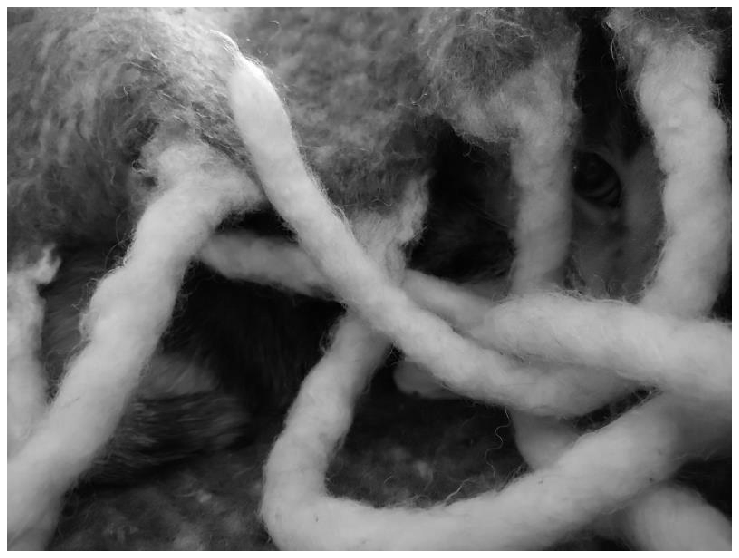

In [18]:
bwnutmeg = skimage.color.rgb2gray(nutmeg)
showimg(bwnutmeg, 2.5, plt.cm.gray)

`rgb2gray()` works by applying a simple calculation to each pixel to convert the RGB intensities to level of whiteness. We can apply a calculation to each pixel using NumPy's `apply_along_axis()` function, setting 'axis' to 2.

In [19]:
def rgb2bw(img):
    def tobw(x):
        #Y = 0.2125 R + 0.7154 G + 0.0721 B
        return (x[0] * .2125 + x[1] * .7154 + x[2] * .0721)/255
    return np.apply_along_axis(tobw, 2, img)

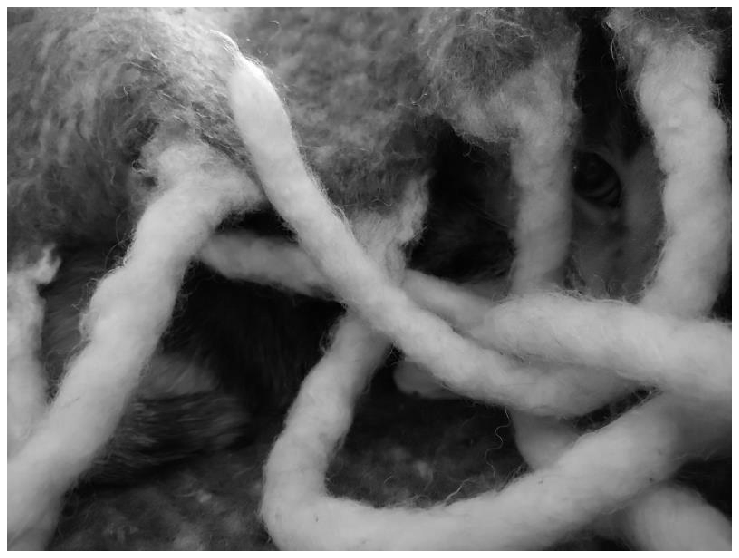

In [20]:
showimg(rgb2bw(nutmeg), 2.5, plt.cm.gray)

#### HSV Colors

Again, each pixel is represented by three numbers:

Hue: A position on a color wheel.
Saturation: How "strong" the color is. On a scale of 0 to 1, 0 is white, 1 is the color identified by Hue.
Value: How light the color is. 0 is black, 1 is the color represented by the Hue and Saturation.

In [23]:
@interact(h=(0,359), s=(0,1,.01), v=(0,1,.01))
def hsvdiv(h=0, s=1, v=1):
    #https://gist.github.com/mathebox/e0805f72e7db3269ec22
    def hsv2hsl(h, s, v):
        l = (0.5 * v  * (2 - s))
        s = (0 if 0 in (v,s) else v * s / (1 - math.fabs(2*l-1))) * 100    
        l = l * 100
        return h, s, l
    
    
    
    h, s, l = hsv2hsl(h,s,v)
    
    display(HTML('<div style="border: 1px solid black;height:3em;background-color:hsl(%d,%d%%,%d%%)"></div>'%(h,s,l)))

interactive(children=(IntSlider(value=0, description='h', max=359), FloatSlider(value=1.0, description='s', ma…

We can convert RGB images to HSV and manipulate HSV elements of images much like we did their HSV elements.

In [24]:
def hsvimg(im, h=1.0, s=1.0, v=1.0):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
    himg = skimage.color.rgb2hsv(im)
    himg = himg * (h, s, v)
    himg = skimage.color.hsv2rgb(himg)
    
    ax1.imshow(im)
    ax1.set_axis_off()
    ax2.imshow(himg)
    ax2.set_axis_off()
    fig.tight_layout()
    plt.show()
    
hw = widgets.FloatSlider(1, min=0, max=1, step=.01, continuous_update=False)
sw = widgets.FloatSlider(1, min=0, max=1, step=.01, continuous_update=False)
vw = widgets.FloatSlider(1, min=0, max=1, step=.01, continuous_update=False)

@interact(h=hw, s=sw, v=vw)
def hsvnutmeg(h=1, s=1, v=1):
    hsvimg(nutmeg, h, s, v)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='h', max=1.0, step=0.01), Fl…

One application here is [colorizing greyscale images](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_tinting_grayscale_images.html#sphx-glr-auto-examples-color-exposure-plot-tinting-grayscale-images-py).

In [27]:
def colorimg(im, h=1.0, s=1.0):
    def colorize(image, hue, saturation=1):
        #https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_tinting_grayscale_images.html#sphx-glr-auto-examples-color-exposure-plot-tinting-grayscale-images-py
        hsv = skimage.color.rgb2hsv(image)
        hsv[:, :, 1] = saturation
        hsv[:, :, 0] = hue
        return skimage.color.hsv2rgb(hsv)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
    cimg = colorize(im, h, s)
    
    ax1.imshow(rgb2bw(im), plt.cm.gray)
    ax1.set_axis_off()
    ax2.imshow(cimg)
    ax2.set_axis_off()
    fig.tight_layout()
    plt.show()
    
hw = widgets.IntSlider(0, min=0, max=360, continuous_update=False)
sw = widgets.FloatSlider(.5, min=0, max=1, step=.01, continuous_update=False)

@interact(h=hw, s=sw)
def colornutmeg(h=1, s=.5):
    colorimg(nutmeg, h, s)

interactive(children=(IntSlider(value=0, continuous_update=False, description='h', max=360), FloatSlider(value…

In [48]:
#https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_histogram_matching.html#sphx-glr-auto-examples-color-exposure-plot-histogram-matching-py
from skimage import exposure
from skimage.exposure import match_histograms

reference = skimage.data.coffee()
image = skimage.data.chelsea()
#image = nutmeg

matched = match_histograms(image, reference, multichannel=True)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

ImportError: cannot import name 'match_histograms' from 'skimage.exposure' (/Users/timjonas/opt/anaconda3/lib/python3.7/site-packages/skimage/exposure/__init__.py)

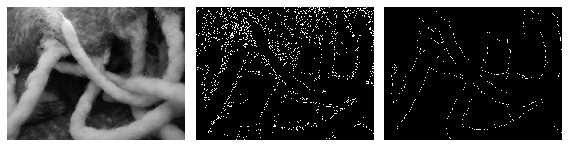

In [44]:
#https://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html
from scipy import ndimage as ndi

from skimage import feature

# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

im=bwnutmeg.copy()

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')

fig.tight_layout()

plt.show()

<!--img = bwnutmeg


s = np.linspace(0, 2*np.pi, 500)
r = 200 + 100*np.sin(s)
c = 700 + 100*np.cos(s)
init = np.array([r, c]).T

init = np.array([
    [100, 600],
    [320, 600],
    [320, 740],
    [100, 740],
    [100, 600]
])

snake = active_contour(gaussian(img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001,
                       coordinates='rc')

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()
init-->

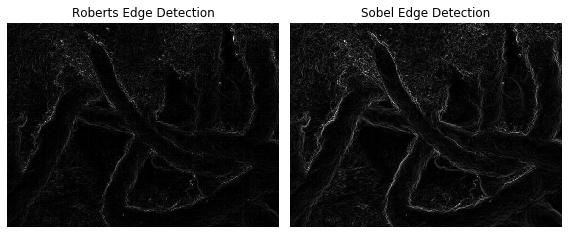

In [45]:
import skimage.filters # import roberts, sobel, sobel_h, sobel_v, scharr, scharr_h, scharr_v, prewitt, prewitt_v, prewitt_h, farid_v, farid_h

#image = skimage.data.camera()
image = bwnutmeg
edge_roberts = skimage.filters.roberts(image)
edge_sobel = skimage.filters.sobel(image)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

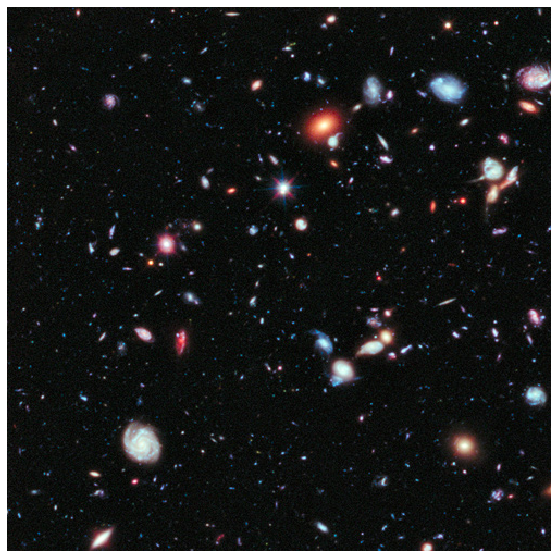

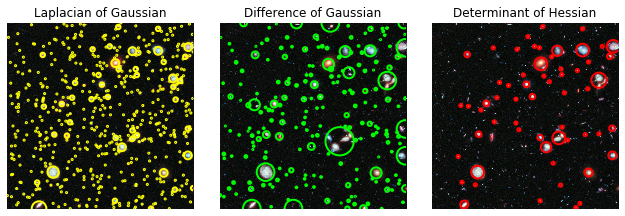

In [46]:
#https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_blob.html
from math import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh

import matplotlib.pyplot as plt

image = skimage.data.hubble_deep_field()[0:500, 0:500]
image_gray = skimage.color.rgb2gray(image)

showimg(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

In [47]:
#https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_chan_vese.html
from skimage.segmentation import chan_vese

def segment(im):
    im = img_as_float(im)
    # Feel free to play around with the parameters to see how they impact the result
    cv = chan_vese(im, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
                   dt=0.5, init_level_set="checkerboard", extended_output=True)

    fig, axes = plt.subplots(1, 3, figsize=(8, 8))
    ax = axes.flatten()

    ax[0].imshow(im, cmap="gray")
    ax[0].set_axis_off()

    ax[1].imshow(cv[0], cmap="gray")
    ax[1].set_axis_off()
    title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))

    ax[2].imshow(cv[1], cmap="gray")
    ax[2].set_axis_off()

    fig.tight_layout()
    plt.show()

segment(skimage.data.camera())

NameError: name 'img_as_float' is not defined

In [ ]:
segment(bwnutmeg)

In [ ]:
house = skimage.io.imread('../data/image/house.tiff')
print(house)
bwhouse = skimage.color.rgb2gray(house)
segment(bwhouse)